# **SHOPPER SENTIMENTS**

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv('/content/TeePublic_review.csv',encoding='ISO-8859-1')

In [3]:
df.drop(['reviewer_id'],axis=1,inplace=True)
df

,store_location,latitude,longitude,date,month,year,title,review,review-label
0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4
...,...,...,...,...,...,...,...,...,...
278095,US,37.090240,-95.712891,2018,4,2027 00:00:00,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
278096,HR,45.100000,15.200000,2018,4,2027 00:00:00,Great quality,"Great quality, fast delivery, would recommend!",5
278097,US,37.090240,-95.712891,2018,4,2027 00:00:00,Dudes rock.,Dudes rock. Seriously.,5
278098,US,37.090240,-95.712891,2018,4,2027 00:00:00,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,5


In [4]:
df.head()

,store_location,latitude,longitude,date,month,year,title,review,review-label
0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [5]:
df.tail()

,store_location,latitude,longitude,date,month,year,title,review,review-label
278095,US,37.09024,-95.712891,2018,4,2027 00:00:00,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
278096,HR,45.10000,15.200000,2018,4,2027 00:00:00,Great quality,"Great quality, fast delivery, would recommend!",5
278097,US,37.09024,-95.712891,2018,4,2027 00:00:00,Dudes rock.,Dudes rock. Seriously.,5
278098,US,37.09024,-95.712891,2018,4,2027 00:00:00,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,5
278099,US,37.09024,-95.712891,2018,4,2027 00:00:00,Not great quality,Print of t shirt was blurry and appeared faded...,2


In [6]:
df.columns

Index(['store_location', 'latitude', 'longitude', 'date', 'month', 'year',
       'title', 'review', 'review-label'],
      dtype='object')

In [7]:
df.dtypes

store_location     object
latitude          float64
longitude         float64
date                int64
month               int64
year               object
title              object
review             object
review-label        int64
dtype: object

In [8]:
df.isna().sum()

store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                12
review            30503
review-label          0
dtype: int64

In [9]:
df=df.dropna(axis=0)
df.isna().sum()

store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64

In [10]:
df['review-label'].unique()

array([5, 4, 3, 1, 2])

In [11]:
target_count=df['review-label'].value_counts()
target_count

review-label
5    181426
4     22943
1     16746
3     15743
2     10730
Name: count, dtype: int64

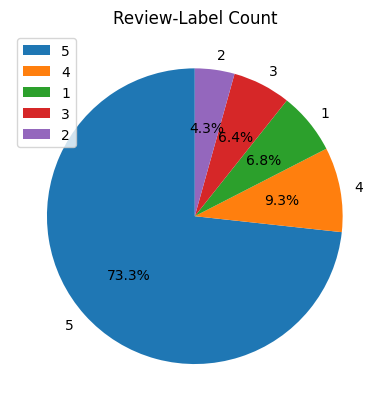

In [12]:
plt.pie(target_count,labels=target_count.index,autopct='%1.1f%%',startangle=90)
plt.title('Review-Label Count')
plt.legend()

In [13]:
# Dropping columns due to imbalanced dataset

df.drop(['store_location','latitude','longitude','date','month','year'],axis=1,inplace=True)

<ipython-input-13-7a61f210fae4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['store_location','latitude','longitude','date','month','year'],axis=1,inplace=True)


In [14]:
df['review-label']=df['review-label'].map({1:0,2:1,3:2,4:3,5:4}).astype(int)
df

<ipython-input-14-a90fe47634ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review-label']=df['review-label'].map({1:0,2:1,3:2,4:3,5:4}).astype(int)


,title,review,review-label
0,Great help with lost order,I had an order that was lost in transit. When ...,4
1,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,4
2,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,4
3,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,4
4,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,3
...,...,...,...
278095,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",4
278096,Great quality,"Great quality, fast delivery, would recommend!",4
278097,Dudes rock.,Dudes rock. Seriously.,4
278098,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,4


In [15]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
df['review']=df['title']+' '+df['review']

<ipython-input-16-161aefbe2057>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['title']+' '+df['review']


In [17]:
# Tokenization

from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
df['tokenized_review']=df['review'].apply(tk.tokenize)
df['tokenized_review']=df['tokenized_review'].apply(lambda tokens:' '.join(tokens))

<ipython-input-17-497ef6a30b2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_review']=df['review'].apply(tk.tokenize)
<ipython-input-17-497ef6a30b2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_review']=df['tokenized_review'].apply(lambda tokens:' '.join(tokens))


In [18]:
reviews=df.review
reviews

0         Great help with lost order I had an order that...
1         I ordered the wrong size tee and hadï¿½ï¿½ï¿½ ...
2         These guys offer the best customerï¿½ï¿½ï¿½ Th...
3         Good Stuff Looked for an obscure phrase on a s...
4         My order arrived in a good timelyï¿½ï¿½ï¿½ My ...
                                ...                        
278095    Highly recommend! Delivery is quick, arrives w...
278096    Great quality Great quality, fast delivery, wo...
278097                   Dudes rock. Dudes rock. Seriously.
278098    Shipping was fast the T-shirt was justï¿½ï¿½ï¿...
278099    Not great quality Print of t shirt was blurry ...
Name: review, Length: 247588, dtype: object

In [19]:
# Removing special characters

reviews=reviews.str.replace('[^a-zA-Z0-9]+',' ')
reviews

0         Great help with lost order I had an order that...
1         I ordered the wrong size tee and hadï¿½ï¿½ï¿½ ...
2         These guys offer the best customerï¿½ï¿½ï¿½ Th...
3         Good Stuff Looked for an obscure phrase on a s...
4         My order arrived in a good timelyï¿½ï¿½ï¿½ My ...
                                ...                        
278095    Highly recommend! Delivery is quick, arrives w...
278096    Great quality Great quality, fast delivery, wo...
278097                   Dudes rock. Dudes rock. Seriously.
278098    Shipping was fast the T-shirt was justï¿½ï¿½ï¿...
278099    Not great quality Print of t shirt was blurry ...
Name: review, Length: 247588, dtype: object

In [20]:
# Removing non-meaningful words

from nltk.tokenize import word_tokenize
reviews=reviews.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
reviews

0         Great help with lost order had order that was ...
1         ordered the wrong size tee and hadï¿½ï¿½ï¿½ or...
2         These guys offer the best customerï¿½ï¿½ï¿½ Th...
3         Good Stuff Looked for obscure phrase shirt Tee...
4         order arrived good timelyï¿½ï¿½ï¿½ order arriv...
                                ...                        
278095    Highly recommend Delivery quick arrives when p...
278096    Great quality Great quality fast delivery woul...
278097                      Dudes rock Dudes rock Seriously
278098    Shipping was fast the T-shirt was justï¿½ï¿½ï¿...
278099    Not great quality Print shirt was blurry and a...
Name: review, Length: 247588, dtype: object

In [21]:
# Stemming

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
reviews=reviews.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
reviews

0         great help with lost order had order that was ...
1         order the wrong size tee and hadï ¿ ½ ï ¿ ½ ï ...
2         these guy offer the best customerï ¿ ½ ï ¿ ½ ï...
3         good stuff look for obscur phrase shirt teepub...
4         order arriv good timelyï ¿ ½ ï ¿ ½ ï ¿ ½ order...
                                ...                        
278095    high recommend deliveri quick arriv when promi...
278096    great qualiti great qualiti fast deliveri woul...
278097                          dude rock dude rock serious
278098    ship was fast the t-shirt was justï ¿ ½ ï ¿ ½ ...
278099    not great qualiti print shirt was blurri and a...
Name: review, Length: 247588, dtype: object

In [22]:
# Stopword removal

from nltk.corpus import stopwords
sw=stopwords.words('english')
reviews=reviews.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
reviews

0         great help lost order order lost transit call ...
1         order wrong size tee hadï ¿ ½ ï ¿ ½ ï ¿ ½ orde...
2         guy offer best customerï ¿ ½ ï ¿ ½ ï ¿ ½ guy o...
3         good stuff look obscur phrase shirt teepubl pr...
4         order arriv good timelyï ¿ ½ ï ¿ ½ ï ¿ ½ order...
                                ...                        
278095    high recommend deliveri quick arriv promis shi...
278096    great qualiti great qualiti fast deliveri woul...
278097                          dude rock dude rock serious
278098    ship fast t-shirt justï ¿ ½ ï ¿ ½ ï ¿ ½ ship f...
278099    great qualiti print shirt blurri appear fade t...
Name: review, Length: 247588, dtype: object

In [23]:
# Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(reviews)

In [24]:
train_data.shape

(247588, 46988)

In [25]:
y=df['review-label']
y

0         4
1         4
2         4
3         4
4         3
         ..
278095    4
278096    4
278097    4
278098    4
278099    1
Name: review-label, Length: 247588, dtype: int64

In [26]:
x=train_data
x

<247588x46988 sparse matrix of type '<class 'numpy.float64'>'
	with 3323891 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
# Model - Decision Tree

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

Confusion Matrix: 
[[ 2237   781   695   295   922]
 [  949   580   602   319   733]
 [  761   631   979   804  1563]
 [  351   291   794  1654  3798]
 [  845   523  1243  3130 48797]]
Accuracy score is 0.7303337506899847


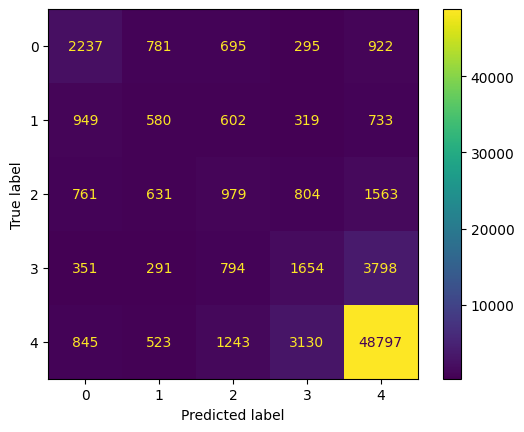

In [29]:
# Model Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
label=[0,1,2,3,4]
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
print('Confusion Matrix: ')
print(mat)
print('Accuracy score is',accuracy_score(y_test,y_pred))

In [30]:
# Model - Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=10,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

Confusion Matrix: 
[[ 2152   386   324   104  1964]
 [  838   288   401   156  1500]
 [  619   288   618   432  2781]
 [  232    94   338   848  5376]
 [  218    55   174   587 53504]]
Accuracy score : 0.7729175922560146


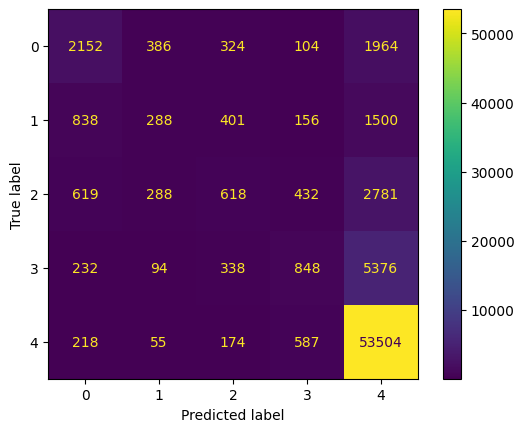

In [31]:
# Model Evaluation

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay
label=[0,1,2,3,4]
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
print('Confusion Matrix: ')
print(mat)
print("Accuracy score :",accuracy_score(y_test,y_pred))

In [32]:
# Model - XGBoost

import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

Confusion Matrix :
[[ 3015   365   338    64  1148]
 [ 1043   436   633   156   915]
 [  612   373  1194   668  1891]
 [  163    73   495  1737  4420]
 [  189    44   179   718 53408]]
Accuracy score : 0.8049598125934003
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      4930
           1       0.34      0.14      0.19      3183
           2       0.42      0.25      0.32      4738
           3       0.52      0.25      0.34      6888
           4       0.86      0.98      0.92     54538

    accuracy                           0.80     74277
   macro avg       0.55      0.45      0.47     74277
weighted avg       0.76      0.80      0.77     74277



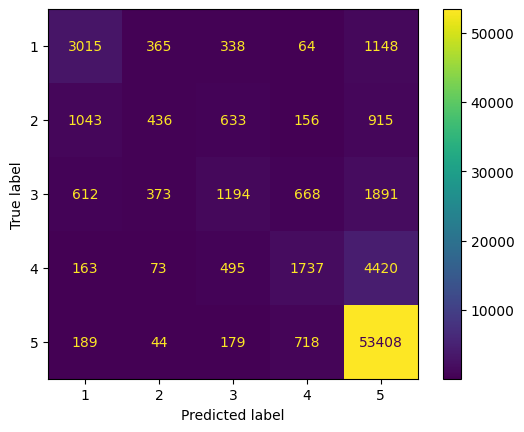

In [33]:
# Model Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
label=[1,2,3,4,5]
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
print('Confusion Matrix :')
print(mat)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

**XGBoost showed Best Performance Amonng the three Models**